In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df["GRE+TOEFL"]=df["GRE Score"]+df['TOEFL Score']
df["LOR+SOP"]=df['SOP']+df[ 'LOR ']

In [ ]:
dic=df.groupby('University Rating').mean()["GRE Score"].to_dict()
df["GRE_MEAN"] = df['University Rating'].map(dic)


In [ ]:
dic1=df.groupby('University Rating').mean()["TOEFL Score"].to_dict()
df["TOEFL_MEAN"] = df['University Rating'].map(dic1)

In [ ]:
dic2=df.groupby('University Rating').mean()["GRE+TOEFL"].to_dict()
df["GRE+TOEFL_MEAN"] = df['University Rating'].map(dic2)

In [ ]:
  df["GRE+TOEFL"]

0      455
1      431
2      420
3      432
4      417
      ... 
495    440
496    454
497    450
498    415
499    440
Name: GRE+TOEFL, Length: 500, dtype: int64

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE+TOEFL,LOR+SOP,GRE_MEAN,TOEFL_MEAN,GRE+TOEFL_MEAN
0,337,118,4,4.5,4.5,9.65,1,0.92,455,9.0,323.304762,110.961905,434.266667
1,324,107,4,4.0,4.5,8.87,1,0.76,431,8.5,323.304762,110.961905,434.266667
2,316,104,3,3.0,3.5,8.00,1,0.72,420,6.5,315.030864,106.314815,421.345679
3,322,110,3,3.5,2.5,8.67,1,0.80,432,6.0,315.030864,106.314815,421.345679
4,314,103,2,2.0,3.0,8.21,0,0.65,417,5.0,309.134921,103.444444,412.579365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,440,8.5,327.890411,113.438356,441.328767
496,337,117,5,5.0,5.0,9.87,1,0.96,454,10.0,327.890411,113.438356,441.328767
497,330,120,5,4.5,5.0,9.56,1,0.93,450,9.5,327.890411,113.438356,441.328767
498,312,103,4,4.0,5.0,8.43,0,0.73,415,9.0,323.304762,110.961905,434.266667


In [ ]:
X=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'GRE+TOEFL','LOR+SOP',"TOEFL_MEAN","GRE+TOEFL_MEAN","GRE_MEAN"]]
Y=df['Chance of Admit ']  

In [ ]:
for i in X:
  df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())



In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE+TOEFL,LOR+SOP,GRE_MEAN,TOEFL_MEAN,GRE+TOEFL_MEAN
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92,0.931507,0.8750,0.800439,0.812850,0.804974
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76,0.602740,0.8125,0.800439,0.812850,0.804974
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72,0.452055,0.5625,0.440370,0.461662,0.448151
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80,0.616438,0.5000,0.440370,0.461662,0.448151
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65,0.410959,0.3750,0.183786,0.244744,0.206062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.87,0.726027,0.8125,1.000000,1.000000,1.000000
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.96,0.917808,1.0000,1.000000,1.000000,1.000000
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.93,0.863014,0.9375,1.000000,1.000000,1.000000
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.73,0.383562,0.8750,0.800439,0.812850,0.804974


In [ ]:
 df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE+TOEFL,LOR+SOP,GRE_MEAN,TOEFL_MEAN,GRE+TOEFL_MEAN
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.978786,0.625551,0.640083,0.639065,0.639955
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.924778,0.652014,0.652941,0.653981,0.653548
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.667189,0.734929,0.992647,0.993606,0.993349
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.650409,0.918258,0.723932,0.726018,0.724936
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.552764,0.905647,0.605725,0.607142,0.606448
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.854813,0.741189,0.703682,0.705098,0.704441
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.551800,0.428572,0.434347,0.430004,0.432964
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.837609,0.729486,0.690368,0.689795,0.690416
GRE+TOEFL,0.978786,0.924778,0.667189,0.650409,0.552764,0.854813,0.551800,0.837609,1.000000,0.661343,0.671522,0.671212,0.671657
LOR+SOP,0.625551,0.652014,0.734929,0.918258,0.905647,0.741189,0.428572,0.729486,0.661343,1.000000,0.731061,0.732993,0.732013


In [ ]:
columns=df.columns

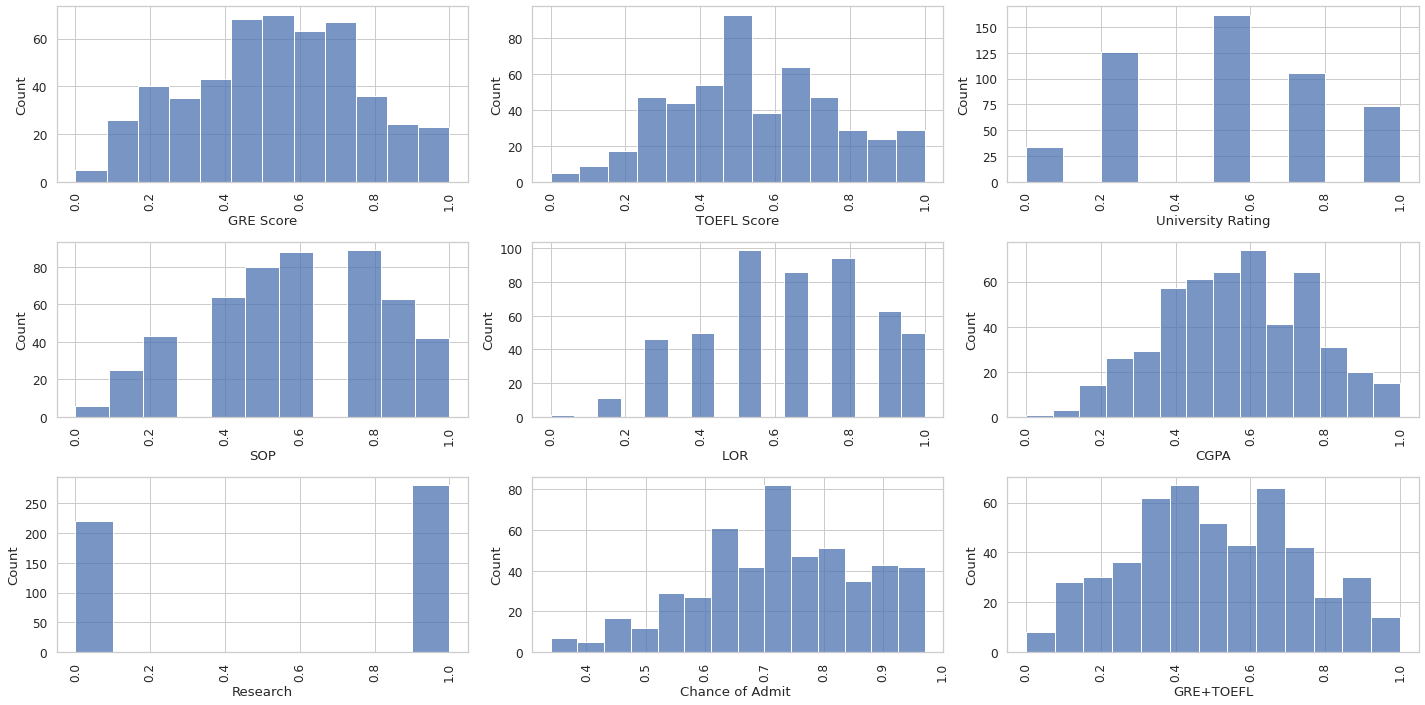

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
fig, ax = plt.subplots(3,3, figsize=(20, 10))
for variable, subplot in zip(columns, ax.flatten()):
    sns.histplot(x=variable,data=df,ax=subplot)
    
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout()

In [ ]:
df["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [ ]:
#SPLIITING THE DATASET INTO TRAIN AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.15, random_state=0)

In [ ]:
# def rfr_model(X, y):
# # Perform Grid-Search
#     gsc = GridSearchCV(
#         estimator=RandomForestRegressor(),
#         param_grid={
#             'max_depth': range(3,7),
#             'n_estimators': (10, 50, 100, 1000),
#         },
#         cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
#     grid_result = gsc.fit(X, y)
#     best_params = grid_result.best_params_
    
#     rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# # Perform K-Fold CV
#    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

#     return scores

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=2000,random_state=0,max_depth=100)
reg.fit(X_train, y_train)
predictions = reg.predict(X_valid)
score = reg.score(X_valid,y_valid)
print(score)

0.7656290721758311


In [ ]:
#
from sklearn.linear_model import LinearRegression
logisticRegr = LinearRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_valid)
score = logisticRegr.score(X_train,y_train)
print(score)

0.8308423499771982
